# Chapter 03 파이토치로 구현하는 ANN

## 3.1 텐서와 Autograd

### 3.1.1 텐서의 차원 자유자재로 다루기

파이토치 임포트

In [8]:
import torch

* 1 -> 스칼라, []
* [1,2,3] -> 벡터, [3]
* [[1,2,3]] -> 행렬, [1,3]
* [[[1,2,3]]] -> n랭크 텐서, [1,1,3]

In [9]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [10]:
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


### 텐서의 랭크와 shape 변경

squeeze 와 unsqueeze 사용
* 원소수는 유지됨


In [11]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [12]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


view() 함수 사용
* 위와 같은 작업을 더 쉽게 할 뿐 아니라, 직접 텐서의 모양을 바꿀 수도 있음.

In [13]:
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


위 함수들로는 원소 개수를 바꿀 수는 없음

In [14]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e)  # 에러 출력

shape '[2, 4]' is invalid for input of size 9


In [15]:
# 함수 활용해보자

x = torch.tensor([[1,2,], [3,4], [5,6]])
print(x)
print(x.shape)

print(torch.unsqueeze(x, 0).shape)
print(torch.unsqueeze(x, 1).shape)
print(torch.unsqueeze(x, 1))
print(x.view(2,3))

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
torch.Size([1, 3, 2])
torch.Size([3, 1, 2])
tensor([[[1, 2]],

        [[3, 4]],

        [[5, 6]]])
tensor([[1, 2, 3],
        [4, 5, 6]])


### 3.1.2 텐서를 이용한 연산과 행렬곱

행렬곱에 사용할 두 행렬 정의

In [16]:
w = torch.randn(5, 3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 0.7083,  0.2452, -0.5996],
        [ 0.9838,  2.1186,  0.5349],
        [-0.1812, -1.0417,  1.4904],
        [ 0.2549, -0.0997, -1.0675],
        [ 0.1869, -1.3469, -1.4098]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


행렬 연산에 사용할 b 정의

In [17]:
b = torch.randn(5, 2, dtype=torch.float)
print("b size:", b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[ 0.1155, -0.0074],
        [-0.0989, -0.0765],
        [ 0.8293,  0.7999],
        [-0.3773,  0.0189],
        [-0.5873, -0.2807]])


행렬곱은 torch.mm() 함수 사용

In [18]:
wx = torch.mm(w, x) # 결과 값 shape는 [5, 2]
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ -1.5540,  -1.2001],
        [ 10.0140,  13.6513],
        [  4.1456,   4.4131],
        [ -5.3819,  -6.2942],
        [-10.9029, -13.4726]])


In [19]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ -1.4385,  -1.2075],
        [  9.9152,  13.5749],
        [  4.9749,   5.2130],
        [ -5.7591,  -6.2753],
        [-11.4901, -13.7533]])


In [20]:
# 복기
import torch

w = torch.randn(12, 4, dtype=torch.float)
x = torch.tensor([[3.0, 2.0], [1.0, 4.0], [2.0, 7.0], [5.0, 4.0]])

b = torch.rand(12, 2, dtype=torch.float)  # 0~1 사이의 숫자를 균등하게 생성

wx = torch.mm(w, x)

result = wx + b

print("result size:", result.size())
print("result:", result)

result size: torch.Size([12, 2])
result: tensor([[ 4.8854, -5.3728],
        [ 2.4414, -2.5003],
        [15.8484, 15.0372],
        [12.4308, 13.3079],
        [-8.7279, -6.2877],
        [ 2.8253, -1.3867],
        [ 3.3927, -5.6650],
        [ 7.8444,  8.4619],
        [-4.4555, -7.7953],
        [-1.1691, -4.0927],
        [-3.4404, -2.0853],
        [ 6.8857,  0.4524]])


### 3.1.3 Autograd
* 수식의 기울기를 자동으로 계산

In [21]:
w = torch.tensor(1.0, requires_grad=True)  # True로 설정하면, Autograd 기능이 자동으로 계산할 때 w에 대한 미분값을 w.grad에 저장

In [22]:
a = w*3

In [23]:
l = a**2

* 위 과정<br/>
$ㅣ = a^2 = (3w)^2 = 9w^2$

l을 w로 미분하려면 체인룰을 이용하여 a와 w로 차례대로 미분해야함.<br/>
backward() 함수를 사용하면 됨

In [24]:
l.backward()
print(f"l을 w로 미분한 값은 {w.grad}")

l을 w로 미분한 값은 18.0


## 3.2 경사하강법으로 이미지 복원하기

### 3.2.2 오염된 이미지를 복원하는 방법

* 대부분의 프로그래머의 접근
    1. weird_function() 함수의 소스코드 분석
    2. 분석을 토대로 함수의 동작을 반대로 이행하는 함수 구현
    3. 2에서 구현한 함수에 오염된 이미지를 입력해서 복구된 이미지 출력

* 머신러닝과 수학적 최적화에 가까운 방법
    1. 오염된 이미지와 크기가 같은 랜덤 텐서를 생성
    2. 랜덤 텐서를 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부름
    3. 가설과 오염된 이미지가 같다면, 무작위 이미지와 원본 이미지도 같을 것
    4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다

### 3.2.3 문제 해결과 코드 구현

In [25]:
import torch
import pickle
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [26]:
import os, sys

os.chdir('/gdrive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN')
sys.path.append(os.chdir)

오염된 이미지 가져오기

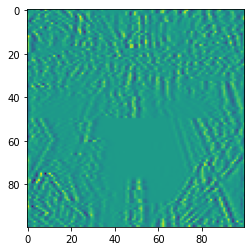

In [27]:
broken_image = torch.FloatTensor(pickle.load(open("./broken_image_t.p", 'rb'),
                                             encoding='latin1'))

plt.imshow(broken_image.view(100,100))

이미지를 오염시키는 함수

In [28]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

오차 구하는 함수

In [29]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)  # dist는 두 텐서 사이의 거리를 구하는 함수

무작위 값을 가진 텐서 생성

In [30]:
random_tensor = torch.randn(10000, dtype=torch.float)

학습률 설정

In [31]:
lr = 0.8

경사하강법의 몸체인 for 반복문 구현<br/>
먼저, 오차 함수를 random_tensor로 미분해야 하니 requires_grad를 True로 설정

Loss at 0 = 12.420320510864258
Loss at 1000 = 1.1281871795654297
Loss at 2000 = 0.541654109954834
Loss at 3000 = 0.37542492151260376
Loss at 4000 = 0.2975103259086609
Loss at 5000 = 0.24922506511211395
Loss at 6000 = 0.21420818567276
Loss at 7000 = 0.1863178163766861
Loss at 8000 = 0.16270078718662262
Loss at 9000 = 0.14184913039207458
Loss at 10000 = 0.12288355082273483
Loss at 11000 = 0.10525204241275787
Loss at 12000 = 0.08858998864889145
Loss at 13000 = 0.07264929264783859
Loss at 14000 = 0.05725853517651558
Loss at 15000 = 0.042298574000597
Loss at 16000 = 0.027688274160027504
Loss at 17000 = 0.02115747146308422
Loss at 18000 = 0.021166203543543816
Loss at 19000 = 0.021167578175663948


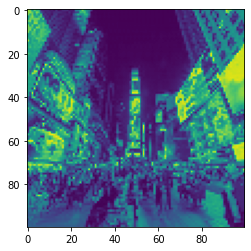

In [32]:
for i in range(0, 20000):
    random_tensor.requires_grad_(True)

    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    # 이번에는 직접 경사하강법을 구현할거기 때문에 torch.no_grad() ㅎ마수를 사용
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    
    # for문이 1000번 반복될 때마다 오차 출력
    if i % 1000 == 0:
        print(f"Loss at {i} = {loss.item()}")

# 복원 됐는지 확인
plt.imshow(random_tensor.view(100, 100).data)  # <- .data는 무엇?

전체 코드 치면서 복기<br/>
5000번 실행 했을때

Loss at 0 = 12.194581031799316
Loss at 1000 = 1.1128884553909302
Loss at 2000 = 0.5373474359512329
Loss at 3000 = 0.3754366636276245
Loss at 4000 = 0.2975025177001953


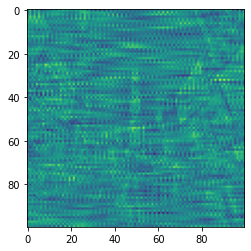

In [33]:
import torch
import pickle
import matplotlib.pyplot as plt

random_tensor = torch.randn(10000, dtype=torch.float)
lr = 0.8

# 경사하강법 구현
for i in range(0, 5000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print(f"Loss at {i} = {loss.item()}")

# 복원된 이미지 시각화
plt.imshow(random_tensor.view(100, 100).data)

## 3.3 신경망 모델 구현하기

### 3.3.1 인공 신경망(ANN)
[관련 영상](https://youtu.be/573EZkzfnZ0)

### 3.3.2 간단한 분류 모델 구현

In [34]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

데이터셋 만들기

In [35]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                            shuffle=True, cluster_std=0.3)

4개의 레이블 2개로 합치기

In [36]:
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

데이터가 제대로 만들어졌는지 확인하기 위해 시각화

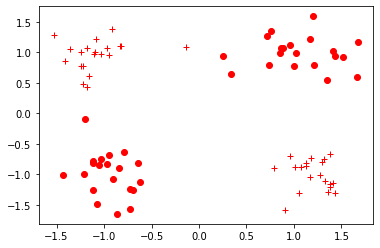

In [37]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none',
                     markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

넘파이 벡터 형식 데이터를 파이토치 텐서로 변경

In [38]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

파이토치에서 신경망은 신경망 모듈을 상속받는 파이썬 클래스로 정의

In [39]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()  # super를 사용하면 nn.Module 클래스의 속성들을 가지고 초기화됨

        self.input_size = input_size
        self.hidden_size = hidden_size
        # 신경망 내 연산 정의
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    # init() 함수에서 정의한 동작들을 차례대로 실행하는 forward() 함수 구현
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

이제 실제로 신경망 객체 생성하고 학습에 필요한 여러 변수와 알고리즘 정의

In [40]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss() # 이진 교차 엔트로피

In [41]:
epochs = 2000

SGD로 최적화

In [42]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

optimizer는 step() ㅎ마수를 부를 떄마다 가중치 갱신

아무 학습도 하지 않은 모델의 성능 시험

In [43]:
model.eval()  # evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 해줌
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(f"Before Training, test loss is {test_loss_before.item()}") # item()은 텐서 속의 숫자를 스칼라 값으로 변환

Before Training, test loss is 0.7145835757255554


학습

In [44]:
for epoch in range(epochs):
    model.train() # 학습모드로 변경
    optimizer.zero_grad() # epoch마다 새로운 경삿값을 계산할 것이므로 zero_grad() 함수로 경삿값 0으로 설정

    train_output = model(x_train)
    # 결과값의 차원을 레이블의 차원과 같게 만들고 오차 계산
    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch % 100 == 0:
        print(f"Train loss at {epoch} is {train_loss.item()}")
    
    # 역전파
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7167900800704956
Train loss at 100 is 0.5710995197296143
Train loss at 200 is 0.4357936382293701
Train loss at 300 is 0.3255808651447296
Train loss at 400 is 0.25489673018455505
Train loss at 500 is 0.20825402438640594
Train loss at 600 is 0.17537672817707062
Train loss at 700 is 0.1511460542678833
Train loss at 800 is 0.13283944129943848
Train loss at 900 is 0.11842656135559082
Train loss at 1000 is 0.10691909492015839
Train loss at 1100 is 0.09750912338495255
Train loss at 1200 is 0.08964606374502182
Train loss at 1300 is 0.0829571858048439
Train loss at 1400 is 0.07719539850950241
Train loss at 1500 is 0.07216419279575348
Train loss at 1600 is 0.06772149354219437
Train loss at 1700 is 0.06376855075359344
Train loss at 1800 is 0.06022891402244568
Train loss at 1900 is 0.057035405188798904


학습된 신경망 평가

In [45]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f"After Training, test loss is {test_loss.item()}")

After Training, test loss is 0.06321384012699127


학습된 모델 .pt 파일로 저장

In [46]:
torch.save(model.state_dict(), '../../saving/model.pt')
print(f'state_dict format of the model: {model.state_dict()}')

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.7031, -1.0992],
        [-1.2795,  1.9671],
        [ 0.7839,  0.8068],
        [ 1.0293, -0.6503],
        [ 1.1087,  1.1158]])), ('linear_1.bias', tensor([-0.3516, -0.2359, -0.1786, -0.1709, -0.2746])), ('linear_2.weight', tensor([[ 1.8420,  2.1944, -1.1590,  1.0842, -1.3545]])), ('linear_2.bias', tensor([-2.2950]))])


가중치를 불러와 모델 생성

In [47]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('../../saving/model.pt'))

<All keys matched successfully>

In [48]:
new_model.eval()
print(f"벡터 [-1, 1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}")

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9867689609527588


전체 코드 활용

In [49]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                            shuffle=True, cluster_std=0.3)

In [50]:
# KMeans로 예측해보자
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)

km.fit(x_train, y_train)

c = km.cluster_centers_



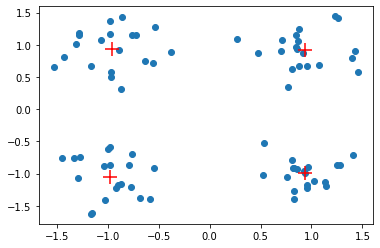

In [51]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(c[:,0], c[:,1], marker='+', color='r', s=200)
plt.show()

In [52]:
km.score(x_test, y_test)

-4.644642623988197

MNIST로 실험

In [53]:
import os, sys
import numpy as np
from PIL import Image
path = '/gdrive/MyDrive/DL_from_bottom'
os.chdir(path)              # 부모는 pardir

sys.path.append(os.chdir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [54]:
t_train = label_map(t_train, [0,1,2,3,4], 0)
t_train = label_map(t_train, [5,6,7,8,9], 1)
t_test = label_map(t_test, [0,1,2,3,4], 0)
t_test = label_map(t_test, [5,6,7,8,9], 1)

In [55]:
## 데이터셋을 파이토치 텐서로 변환
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
t_train = torch.FloatTensor(t_train)
t_test = torch.FloatTensor(t_test)

In [56]:
## 신경망 모델 정의
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):  # 과정속에서 호출되기 때문에 직접 호출할 일은 없음
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [57]:
## 신경망 모델 생성 및 관련 변수와 알고리즘 정의
model = NeuralNet(784, 50)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 100
optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate)

In [58]:
## 신경망 학습

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), t_train)
    if epoch % 10 == 0:
        print(f"Train loss at {epoch} is {train_loss.item()}")
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 13.202646255493164
Train loss at 10 is 50.99333190917969
Train loss at 20 is 50.99333190917969
Train loss at 30 is 50.99333190917969
Train loss at 40 is 50.99333190917969
Train loss at 50 is 50.99333190917969
Train loss at 60 is 50.99333190917969
Train loss at 70 is 50.99333190917969
Train loss at 80 is 50.99333190917969
Train loss at 90 is 50.99333190917969


In [60]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), t_test)
print(f"After Training, testloss is {test_loss.item()}")

After Training, testloss is 51.38999938964844


In [64]:
## 학습된 가중치 저장
torch.save(model.state_dict(), '../3-min-pytorch/saving/model_mnist.pt')

In [76]:
new_model = NeuralNet(784, 50)
new_model.load_state_dict(torch.load('../3-min-pytorch/saving/model_mnist.pt'))
new_model.eval()
print(new_model(torch.randint(255, (784,), dtype=torch.float)).item())

1.0
